# Unsupervised Learning | Clustering (K-Means) | Assignment

## Customer / Marketing Segmentation [Clustering (K-Means)]

### Importing Libraries

In [145]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

In [124]:
import warnings
warnings.filterwarnings('ignore')

### Loading & Inspecting Data

In [125]:
# Load the data & check what's inside
mrkt = pd.read_csv ('marketing-segmentation.csv')
mrkt.head()

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06


### Exploring Data

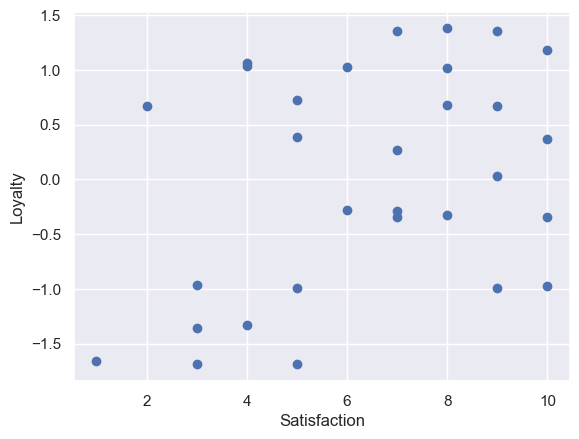

In [127]:
plt.scatter(mrkt['Satisfaction'],mrkt['Loyalty'],cmap='rainbow')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

### Data Preprocessing

In [131]:
#checking if there's null values
mrkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Satisfaction  30 non-null     int64  
 1   Loyalty       30 non-null     float64
dtypes: float64(1), int64(1)
memory usage: 612.0 bytes


In [130]:
mrkt[mrkt.notna()]

,Satisfaction,Loyalty
0,4,-1.33
1,6,-0.28
2,5,-0.99
3,7,-0.29
4,4,1.06
5,1,-1.66
6,10,-0.97
7,8,-0.32
8,8,1.02
9,8,0.68


### Model Training & Prediction

In [132]:
from sklearn.cluster import KMeans

In [133]:
km = KMeans(n_clusters=3,init='k-means++',random_state=42)

In [134]:
km_labels = km.fit_predict(mrkt)

In [135]:
km.cluster_centers_

array([[ 5.66666667,  0.19083333],
       [ 9.        ,  0.33916667],
       [ 2.66666667, -1.055     ]])

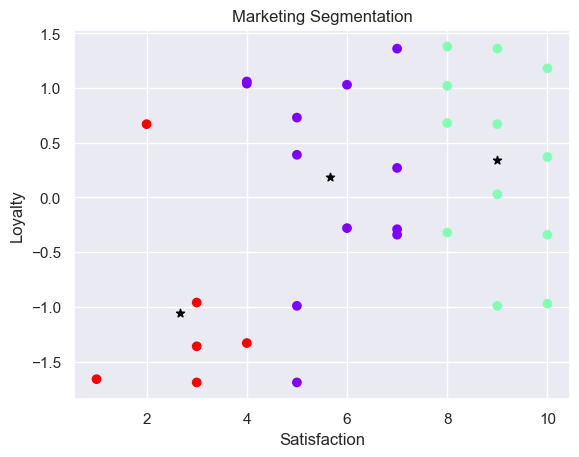

In [136]:
plt.scatter(mrkt['Satisfaction'],mrkt['Loyalty'],c=km_labels,cmap='rainbow')
#Adding centroids
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],c='black',marker='*')
plt.title('Marketing Segmentation')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

### Finding the Optimal Number of Clusters (Elbow / Knee Method)

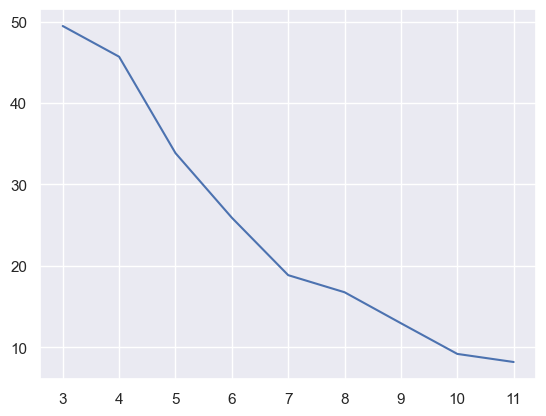

Text(0.5, 1.0, 'The Elbow/Knee Method')

In [162]:
WCSS = []
for i in range(3,12):
    km = KMeans(n_clusters=i,init='k-means++',random_state=42)
    km.fit(mrkt)
    WCSS.append(km.inertia_)
plt.plot(range(3,12),WCSS)
plt.show()
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('The Elbow/Knee Method')    

In [163]:
Km_Elbow = KMeans(7,init='k-means++',random_state=42)

In [164]:
Km_Elbow.fit(mrkt)

KMeans(n_clusters=7, random_state=42)

In [165]:
labels = Km_Elbow.predict(mrkt)

In [166]:
centers = Km_Elbow.cluster_centers_

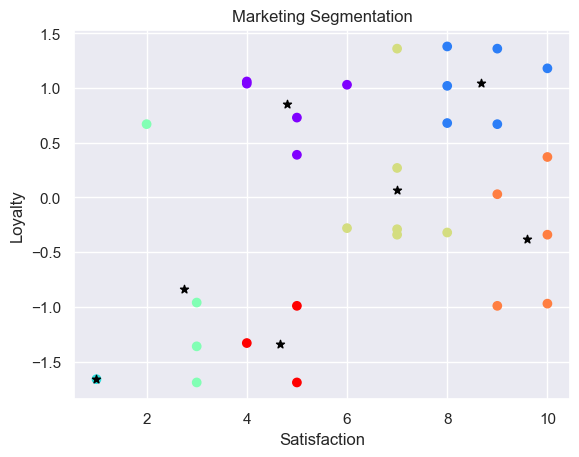

In [167]:
plt.scatter(mrkt['Satisfaction'],mrkt['Loyalty'],c=labels,cmap='rainbow')
#Adding centroids
plt.scatter(centers[:,0],centers[:,1],c='black',marker='*')
plt.title('Marketing Segmentation')
plt.xlabel('Satisfaction')
plt.ylabel('Loyalty')
plt.show()

==========

# GOOD LUCK!